# Iris Analysis

In [1]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load Data Frame

In [2]:
Iris = pd.read_csv('Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [3]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
Iris.shape

(150, 6)

In [5]:
round(Iris.describe(), 3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000,150.000,150.000,150.000,150.000
mean,75.500,5.843,3.054,3.759,1.199
std,43.445,0.828,0.434,1.764,0.763
min,1.000,4.300,2.000,1.000,0.100
25%,38.250,5.100,2.800,1.600,0.300
50%,75.500,5.800,3.000,4.350,1.300
75%,112.750,6.400,3.300,5.100,1.800
max,150.000,7.900,4.400,6.900,2.500


In [6]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
Iris.duplicated(subset='Species').sum()

np.int64(147)

In [8]:
iris = Iris.drop_duplicates(subset='Species')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [9]:
Iris.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Visualization

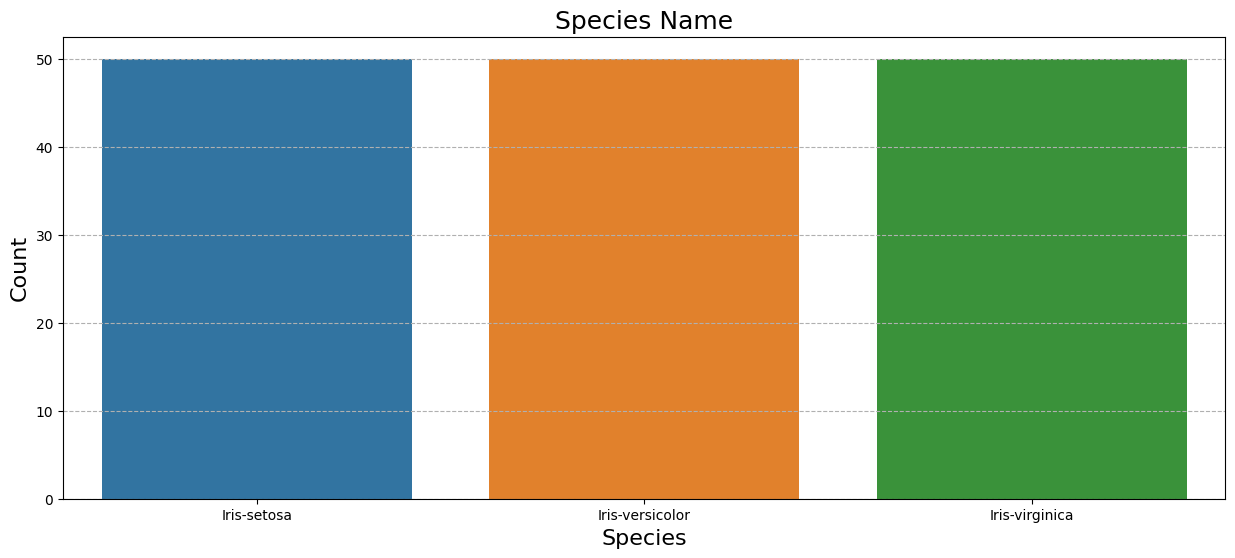

In [10]:
# Count Plot
plt.figure(figsize=(15, 6))
sns.countplot(x='Species', data=Iris, hue='Species')
plt.title("Species Name", fontsize=18)
plt.xlabel("Species", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.grid(axis='y', linestyle='--')
plt.show()

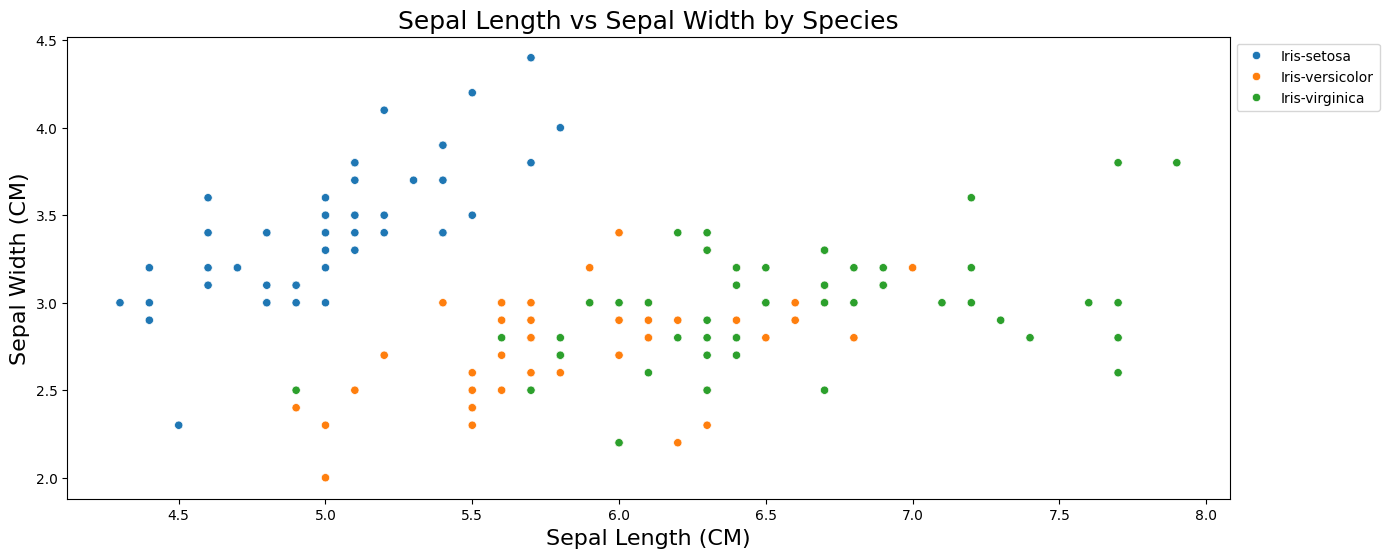

In [11]:
# Scatter Plot-01
plt.figure(figsize=(15, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=Iris, hue='Species')
plt.title("Sepal Length vs Sepal Width by Species", fontsize=18)
plt.xlabel("Sepal Length (CM)", fontsize=16)
plt.ylabel("Sepal Width (CM)", fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

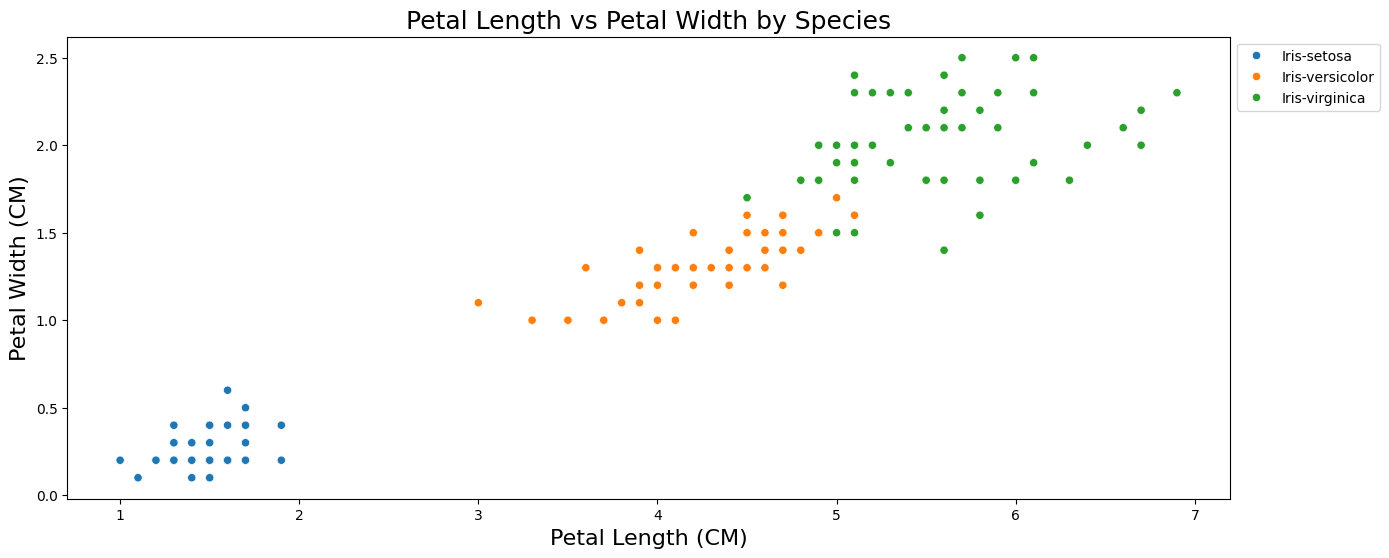

In [12]:
# Scatter Plot-02
plt.figure(figsize=(15, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=Iris, hue='Species')
plt.title("Petal Length vs Petal Width by Species", fontsize=18)
plt.xlabel("Petal Length (CM)", fontsize=16)
plt.ylabel("Petal Width (CM)", fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

<Figure size 1500x600 with 0 Axes>

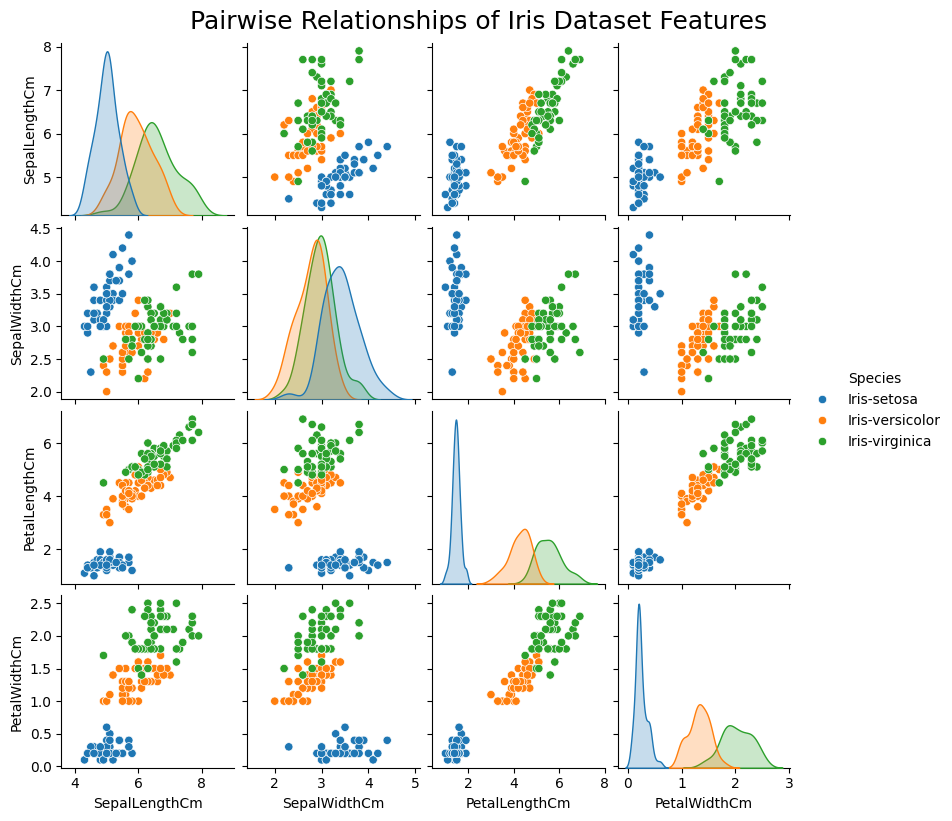

In [13]:
# Pair Plot
plt.figure(figsize=(15, 6))
sns.pairplot(Iris.drop(['Id'], axis = 1), 
             hue='Species', height=2)
plt.suptitle("Pairwise Relationships of Iris Dataset Features", y=1.02, fontsize=18)
plt.show()

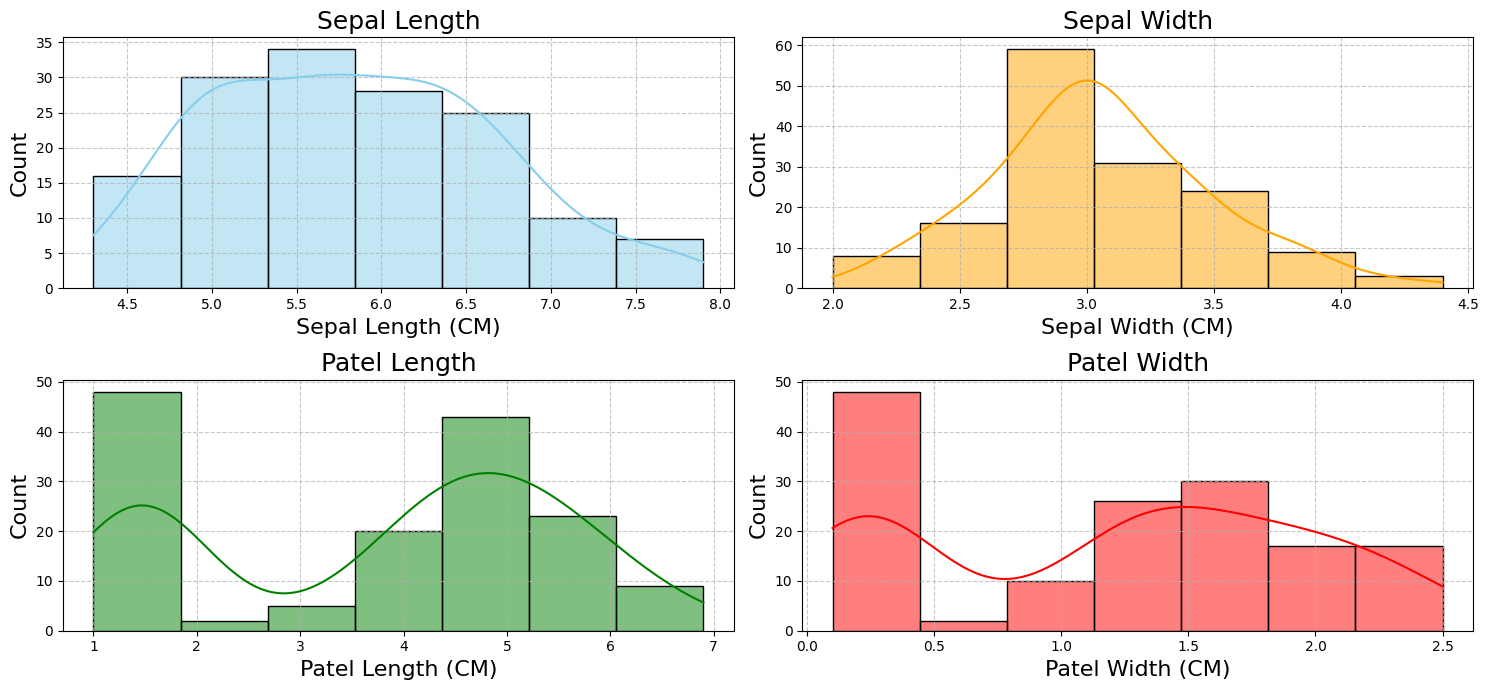

In [14]:
# Histogram
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

def graph_hist(y, ax, color, title):
    sns.histplot(Iris[y], bins=7, kde=True, color=color, ax=ax)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(f"{title} (CM)", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.7)

graph_hist('SepalLengthCm', axes[0, 0], "skyblue", title="Sepal Length")
graph_hist('SepalWidthCm', axes[0, 1], "orange", title="Sepal Width")
graph_hist('PetalLengthCm', axes[1, 0], "green", title="Patel Length")
graph_hist('PetalWidthCm', axes[1, 1], "red", title="Patel Width")

plt.tight_layout()
plt.show()

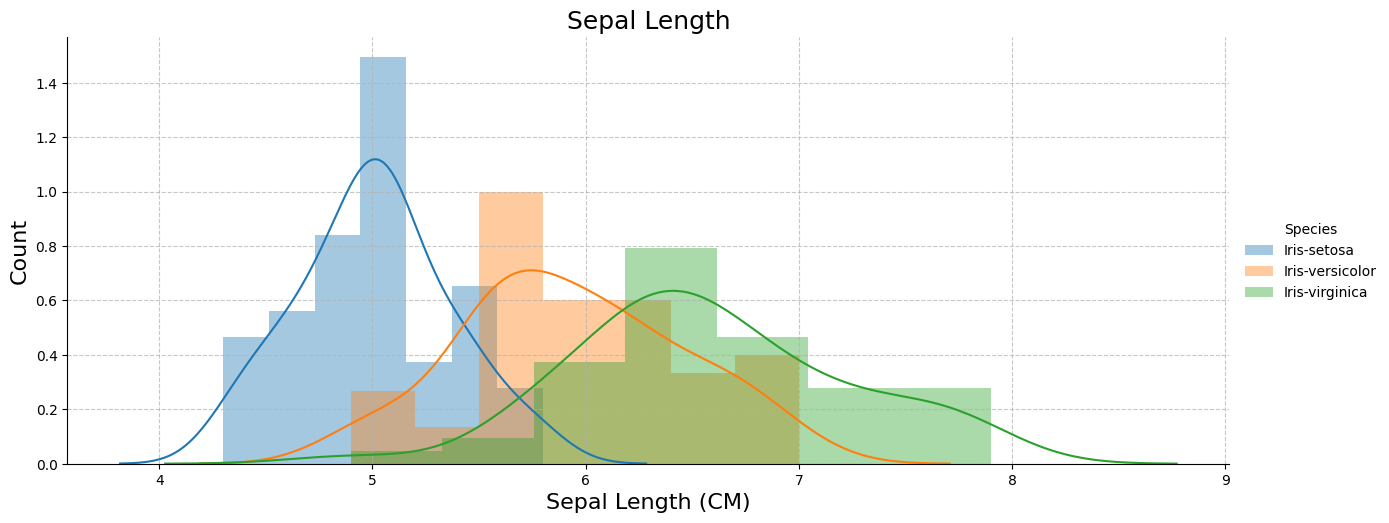

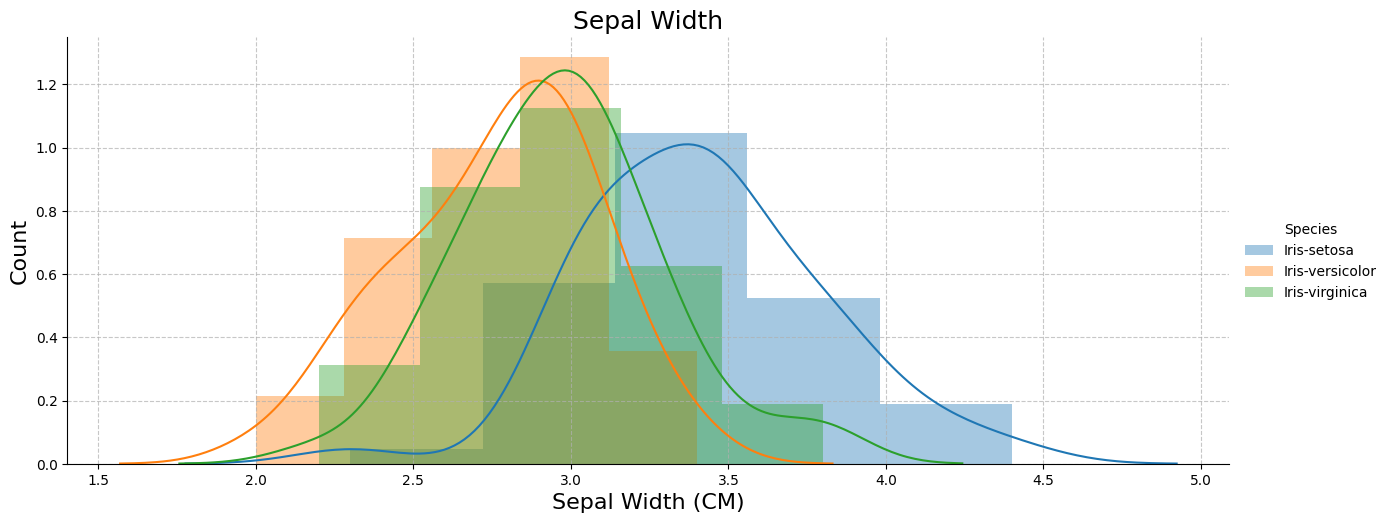

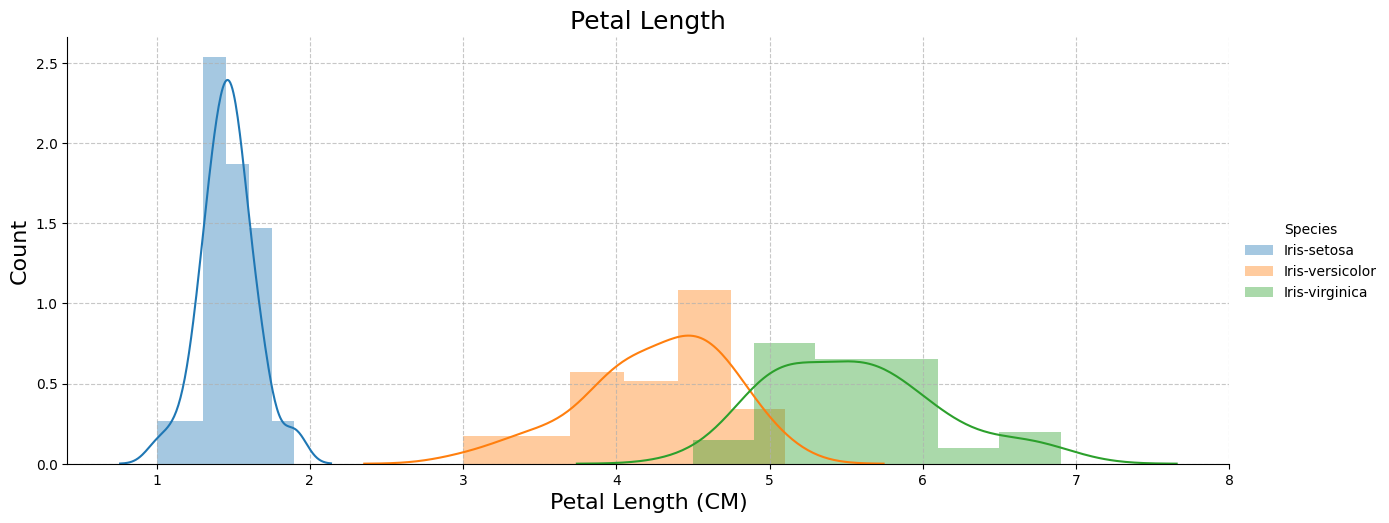

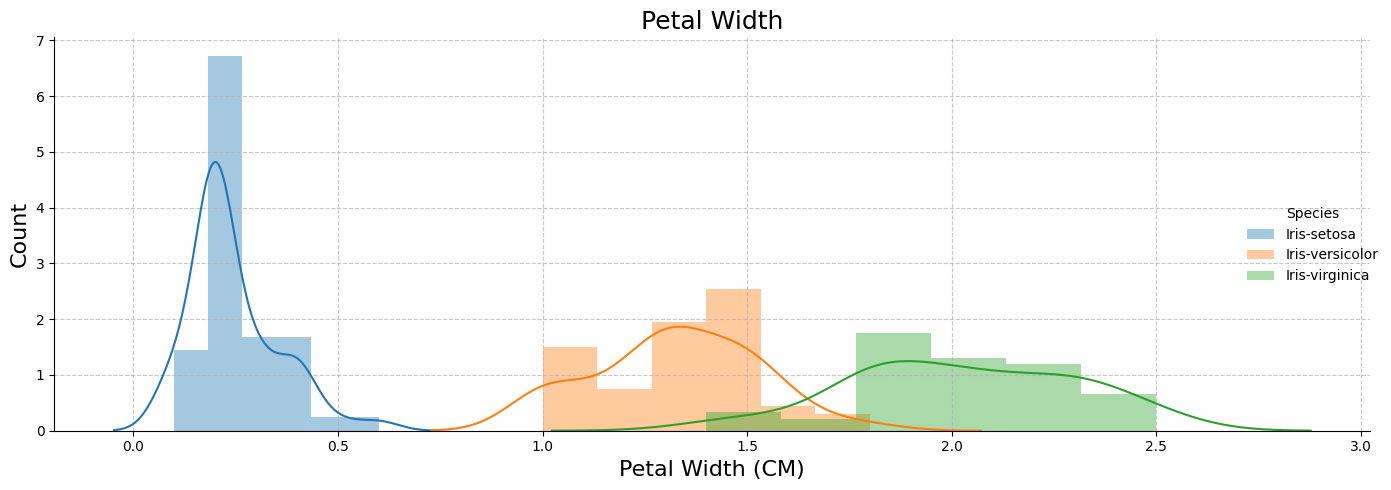

In [15]:
# Dist Plot
def graph_dist(y, bins, title):
    plot = sns.FacetGrid(Iris, hue='Species', height=5, aspect=2.5)
    plot.map(sns.distplot, y, kde=True, bins=bins).add_legend()
    plt.title(title, fontsize=18)
    plt.xlabel(f"{title} (CM)", fontsize=16)
    plt.ylabel("Count", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)

graph_dist('SepalLengthCm', bins=7, title="Sepal Length")
graph_dist('SepalWidthCm', bins=5, title="Sepal Width")
graph_dist('PetalLengthCm', bins=6, title="Petal Length")
graph_dist('PetalWidthCm', bins=6, title="Petal Width")

plt.tight_layout()
plt.show()

In [16]:
# Correlation-01
iris.select_dtypes(include=['number']).corr(method='pearson').drop(['Id'], axis=1).drop(['Id'], axis=0)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.643817,-0.673417,0.975713,1.000000


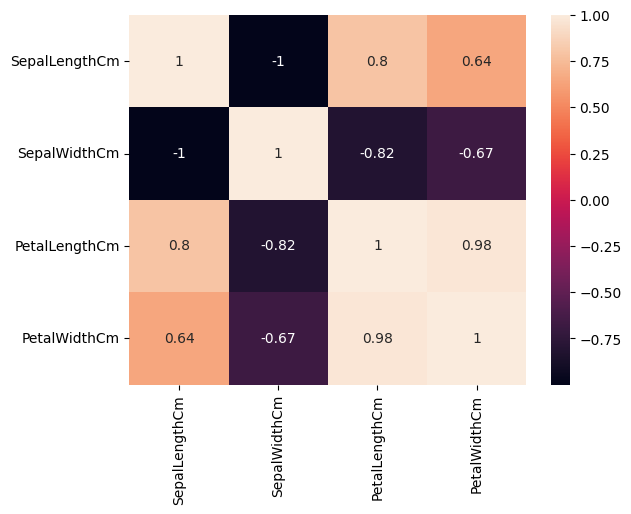

In [17]:
# Heatmap-01
sns.heatmap(iris.select_dtypes(include=['number']).corr(method='pearson').drop(['Id'], axis=1).drop(['Id'], axis=0), annot=True)
plt.show()

In [18]:
# Correlation-02
Iris.select_dtypes(include=['number']).corr(method='pearson').drop(['Id'], axis=1).drop(['Id'], axis=0)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


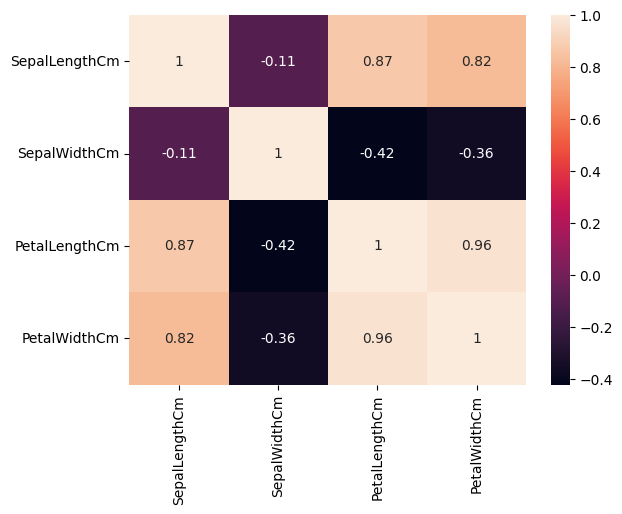

In [19]:
# Heatmap-02
sns.heatmap(Iris.select_dtypes(include=['number']).corr(method='pearson').drop(['Id'], axis=1).drop(['Id'], axis=0), annot=True)
plt.show()

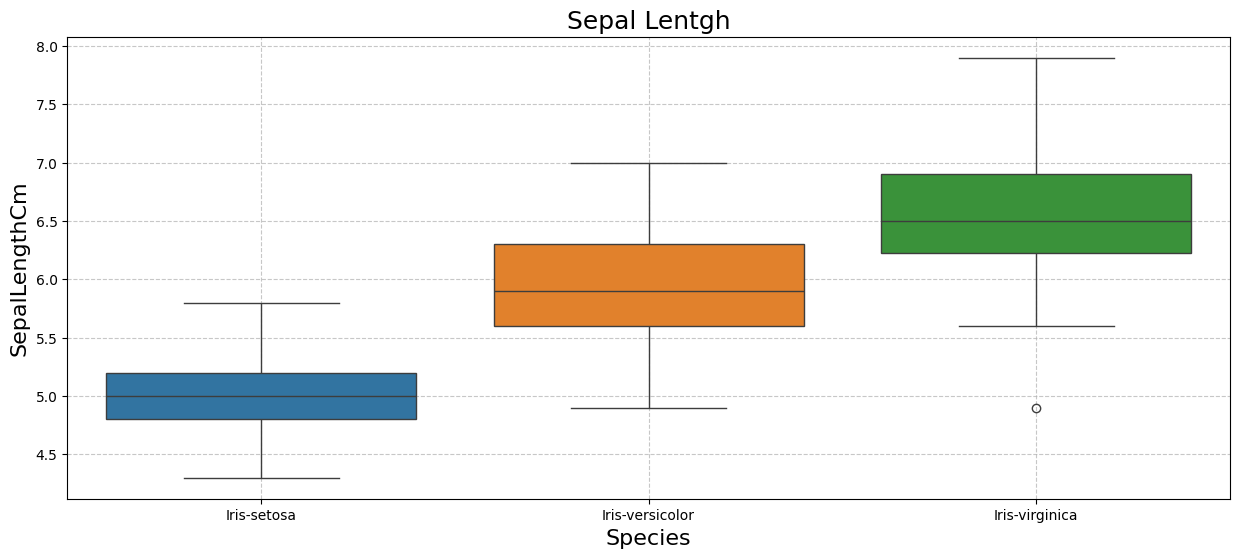

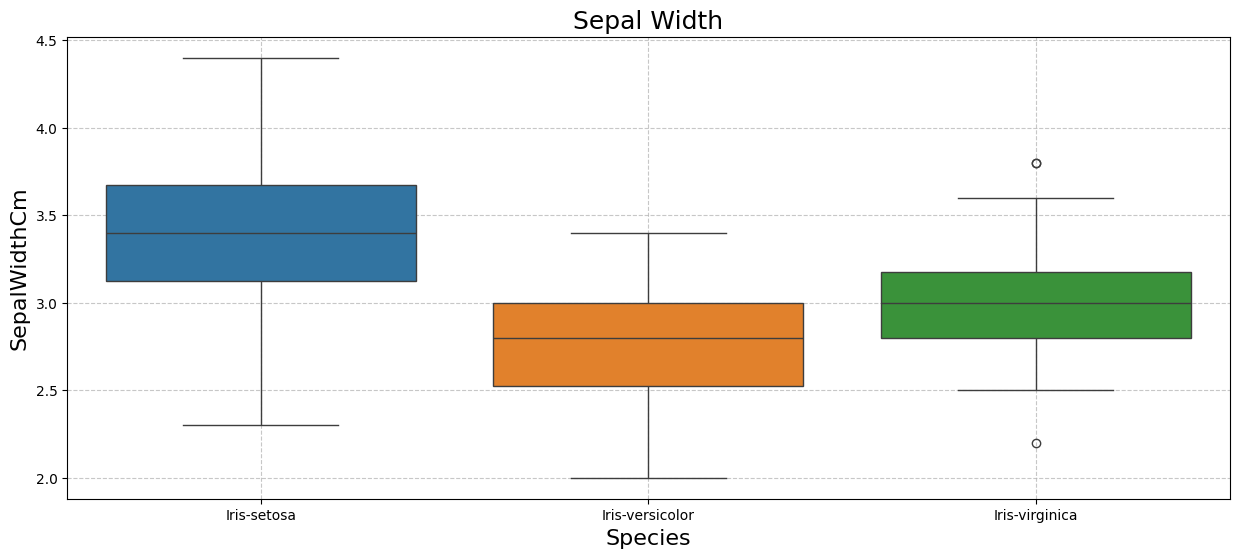

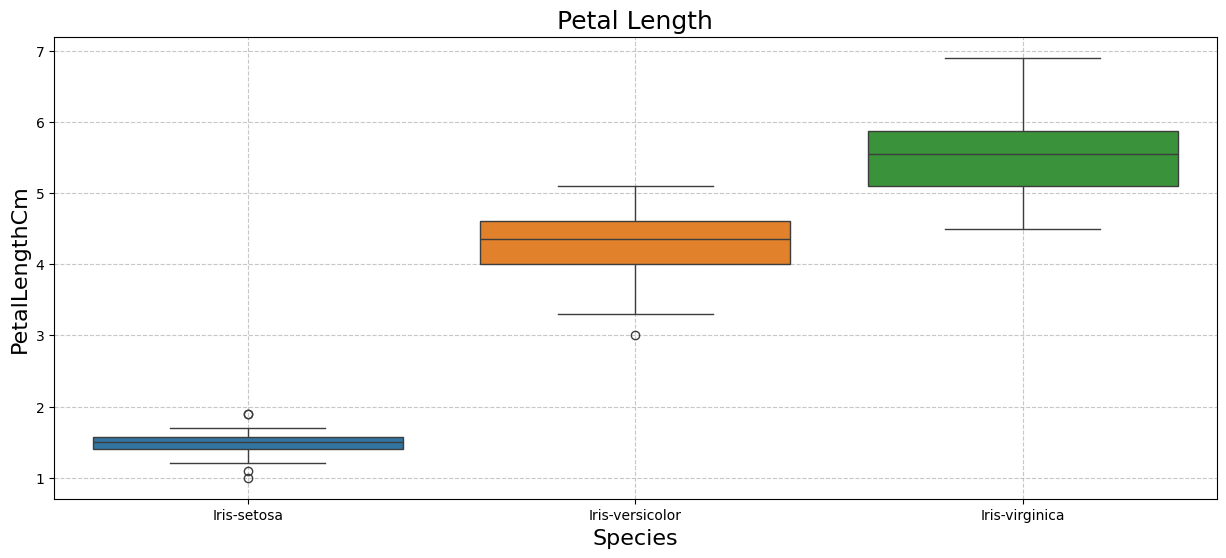

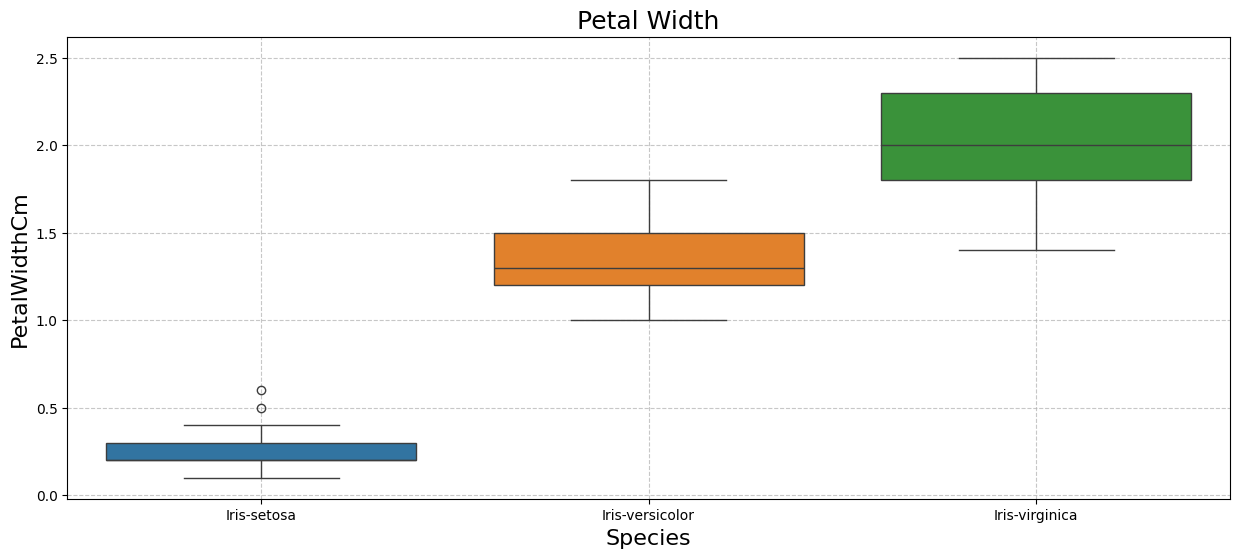

In [20]:
# Box Plot
def graph_box(y, title):
    plt.figure(figsize=(15, 6))  # New figure for each 
    sns.boxplot(x='Species', y=y, data=Iris, hue='Species')
    plt.title(title, fontsize=18)
    plt.xlabel("Species", fontsize=16)
    plt.ylabel(f"{y}", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)


graph_box('SepalLengthCm', title="Sepal Lentgh")
graph_box('SepalWidthCm', title="Sepal Width")
graph_box('PetalLengthCm', title="Petal Length")
graph_box('PetalWidthCm', title="Petal Width")

plt.show()

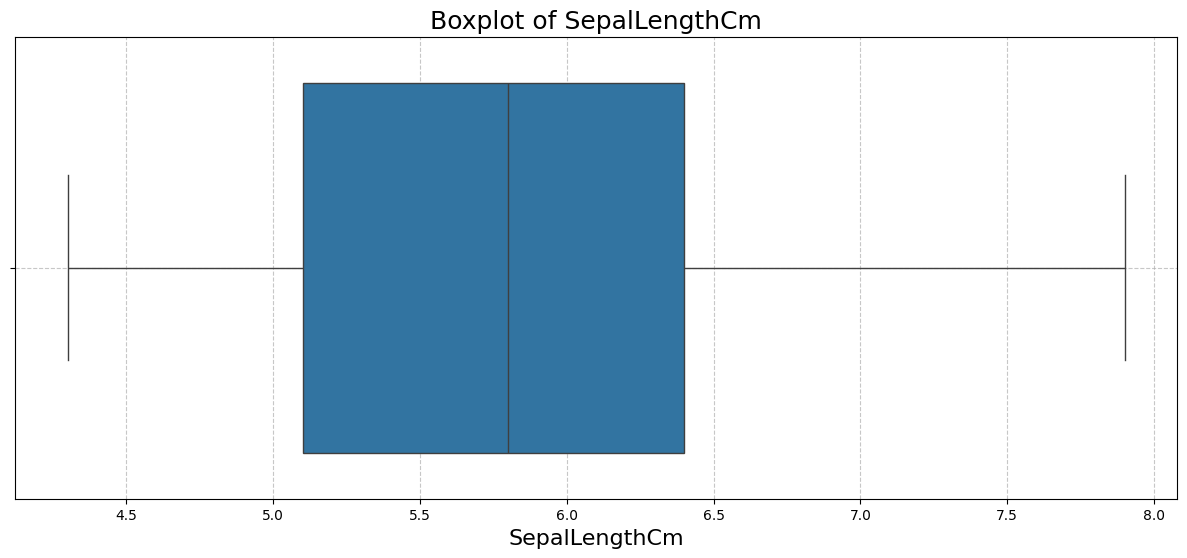

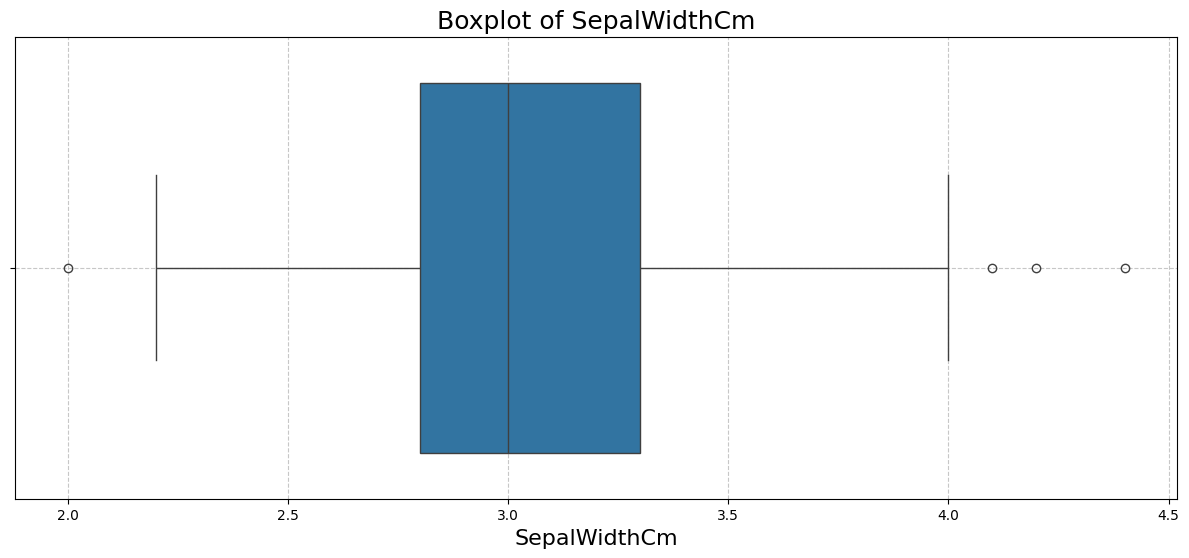

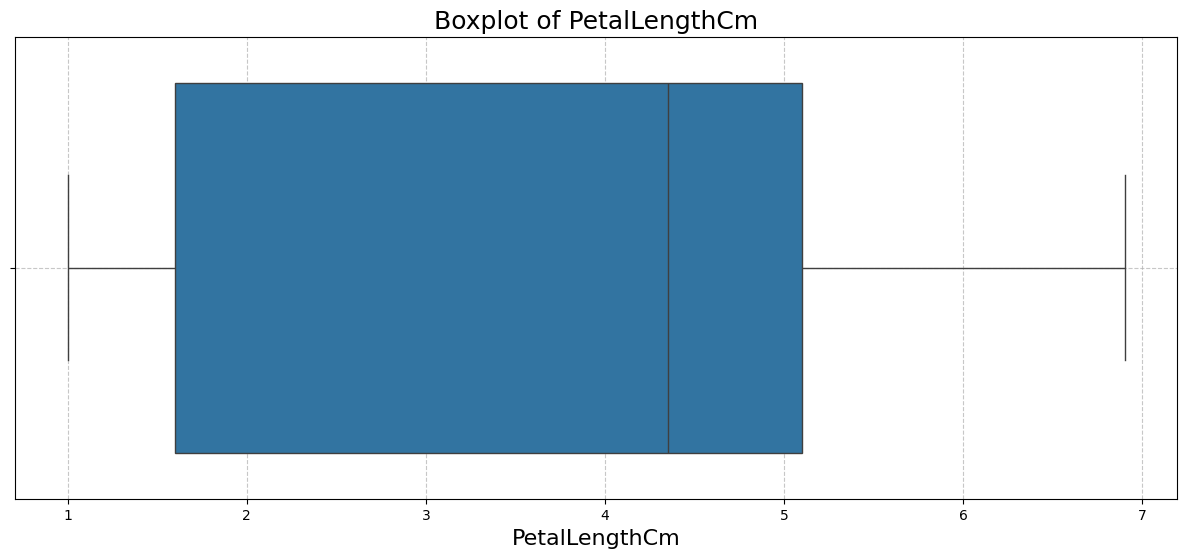

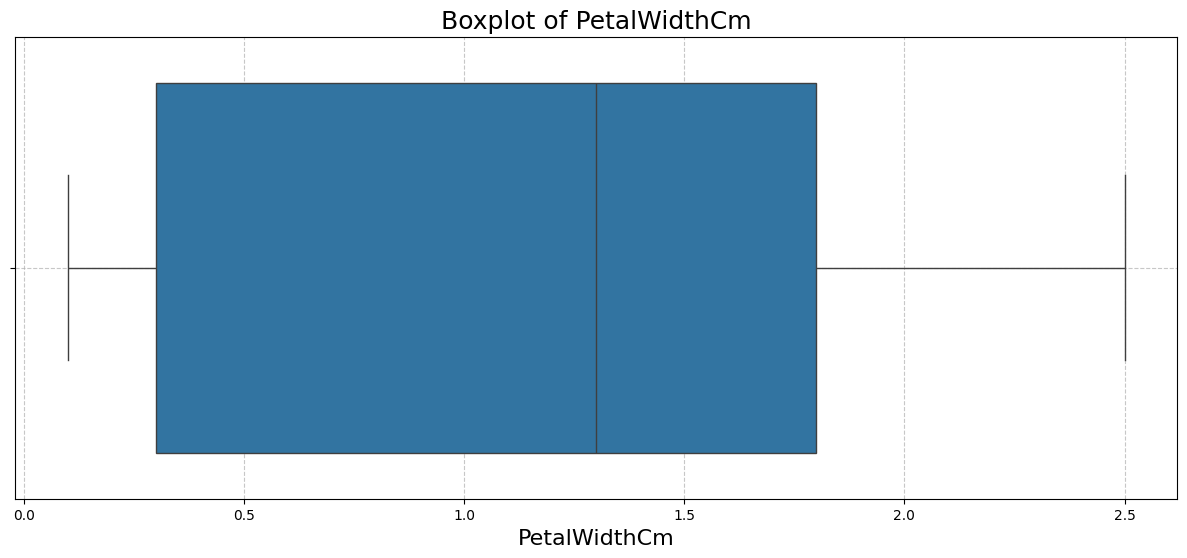

In [21]:
# Handeling Outliers
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=col, data=Iris)
    plt.title(f"Boxplot of {col}", fontsize=18)
    plt.xlabel(f"{col}", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


Old Shape:  (150, 6)
New Shape:  (146, 6)


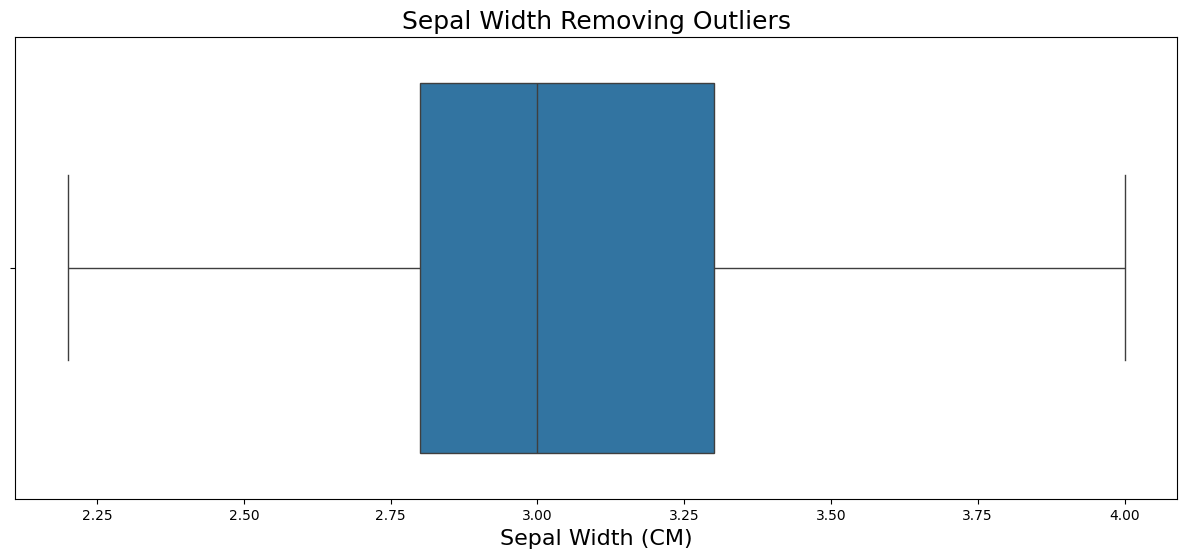

In [22]:
# Removing Outliers IQR Method 
Q1 = np.percentile(Iris['SepalWidthCm'], 25, 
				interpolation = 'midpoint') 

Q3 = np.percentile(Iris['SepalWidthCm'], 75, 
				interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", Iris.shape) 

# Upper bound 
upper = np.where(Iris['SepalWidthCm'] >= (Q3+1.5*IQR)) 

# Lower bound
lower = np.where(Iris['SepalWidthCm'] <= (Q1-1.5*IQR)) 

# Removing the Outliers
Iris.drop(upper[0], inplace = True) 
Iris.drop(lower[0], inplace = True) 

print("New Shape: ", Iris.shape) 

plt.figure(figsize=(15, 6))
sns.boxplot(x='SepalWidthCm', data=Iris)
plt.title("Sepal Width Removing Outliers", fontsize=18)
plt.xlabel("Sepal Width (CM)", fontsize=16)

plt.show()

# Conclusion

# What I Did:
- Imported and explored the dataset.
- Performed **data cleaning** (handled missing values, duplicates, outliers).
- Conducted **Exploratory Data Analysis (EDA)** using summary statistics and visualizations.
- Compared feature distributions across different categories.
- Identified relationships and correlations among variables.

# Methods/Techniques Used:
- **Descriptive Statistics** (mean, median, mode, quartiles, IQR).
- **Data Visualization** (histograms, boxplots, scatterplots, pairplots, heatmaps).
- **Outlier Detection** (IQR method / boxplot analysis).
- **Correlation Analysis** (Pearson correlation & heatmap).
- **Class/Group Comparisons** to highlight differences between categories.

Overall, the dataset was well-analyzed, cleaned, and prepared for further **Machine Learning modeling** or deeper statistical analysis.